<a href="https://colab.research.google.com/github/Thasan112/Amaazon-Regional-Sales-analysis/blob/main/Amaazon_Regional_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

Analyzed Amaazon’s 2014–2018 sales data to identify key revenue and profit drivers across products, channels, and regions; uncovered seasonal trends and outliers; and benchmarked performance against budget targets. Applied these insights to optimize pricing and promotional strategies, guide market expansion, and support sustainable growth while reducing concentration risk.

In [60]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (    0,6)


In [61]:
sheets = pd.read_excel('/content/Regional Sales Dataset.xlsx', sheet_name=None)


In [62]:
# Assign dataframe to each sheet

df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']


In [63]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


**Data Profiling**

In [64]:
df_sales.shape

(64104, 12)

In [65]:
print("df_sales shapes:", df_sales.shape)
print("df_customers shapes:", df_customers.shape)
print("df_products shapes:", df_products.shape)
print("df_regions shapes:", df_regions.shape)
print("df_state_reg shapes:", df_state_reg.shape)
print("df_budgets shapes:", df_budgets.shape)

df_sales shapes: (64104, 12)
df_customers shapes: (175, 2)
df_products shapes: (30, 2)
df_regions shapes: (994, 15)
df_state_reg shapes: (49, 3)
df_budgets shapes: (30, 2)


In [66]:
df_sales.head(5)




,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [67]:
df_customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [68]:
df_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [69]:
df_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [70]:
df_state_reg.head(5)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [71]:
#change state_reg coloumn
new_header=df_state_reg.iloc[0]
df_state_reg=df_state_reg[1:]
df_reg_coloumn=new_header
df_state_reg.head(5)

,Column1,Column2,Column3
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West
5,CO,Colorado,West


In [72]:
df_budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [73]:
df_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [74]:
# Null value check
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [75]:
df_products.isnull().sum()

,0
Index,0
Product Name,0


In [76]:
df_customers.isnull().sum()

,0
Customer Index,0
Customer Names,0


In [77]:
df_state_reg.isnull().sum()

,0
Column1,0
Column2,0
Column3,0


In [78]:
df_regions.isnull().sum()

,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


In [79]:
df_budgets.isnull().sum()

,0
Product Name,0
2017 Budgets,0


**Data Cleaning and Wrangling**

In [80]:
#Merge with customers
# Sales and customer index
df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)


df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [81]:
#Merge with products
df=df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

df.head(5)


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [82]:
#Merge with Regions
df=df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [83]:
#Merge with state regions

# Get the relevant columns from df_state_reg and rename them for merging
# Since 'state_code' was dropped from df, we will use the 'state' column for merging.
# We need to prepare df_state_reg to merge on full state names.
df_state_reg_for_merge_by_state = df_state_reg[['Column2', 'Column3']].copy() # Column2 is 'State' (full name), Column3 is 'Region'
df_state_reg_for_merge_by_state.columns = ['state_name_from_reg', 'region'] # Rename for clarity and merging

# Ensure the state names are in the same case for merging
df_state_reg_for_merge_by_state['state_name_from_reg'] = df_state_reg_for_merge_by_state['state_name_from_reg'].str.lower()
df['state'] = df['state'].str.lower() # Ensure 'state' column in df is also lowercase

df = df.merge(
    df_state_reg_for_merge_by_state,
    how='left',
    left_on='state', # Use the 'state' column from df (lowercase full name)
    right_on='state_name_from_reg' # Use the renamed 'state' column from df_state_reg_for_merge_by_state (lowercase full name)
)
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,state_name_from_reg,region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,georgia,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,indiana,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,california,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,indiana,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,connecticut,Northeast


In [84]:
# Ensure df columns are lowercase before merging with budgets
df.columns = df.columns.str.lower()

df = df.merge(
    df_budgets,
    how='left',
    left_on='product name', # Corrected to merge string product names
    right_on='Product Name',
    suffixes=('', '_budgets') # Avoid duplicate column names
)

df.head(10)

,ordernumber,orderdate,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order quantity,unit price,...,population,households,median_income,land_area,water_area,time_zone,state_name_from_reg,region,Product Name,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,145674,52798,36466,268318796,13908113,America/New York,georgia,South,Product 27,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,indiana,Midwest,Product 20,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,79510,26020,124759,62489257,386195,America/Los Angeles,california,West,Product 26,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,indiana,Midwest,Product 7,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,58007,24141,63158,70972793,720300,America/New York,connecticut,Northeast,Product 8,1085037.329
5,SO - 0010394,2014-01-01,138,Export,USD,NXH382,626,23,11,5219.3,...,51669,22676,78589,69730100,5587760,America/Chicago,minnesota,Midwest,Product 23,1135815.758
6,SO - 0008865,2014-01-01,53,Wholesale,USD,GUT930,540,1,7,2874.3,...,59195,25324,95518,17508399,184972,America/New York,massachusetts,Northeast,Product 1,3016489.209
7,SO - 0009909,2014-01-01,45,Wholesale,USD,AXW291,156,25,10,1045.2,...,153266,39378,49186,59446734,26188,America/Los Angeles,california,West,Product 25,5342315.484
8,SO - 0001912,2014-01-01,85,Wholesale,USD,AXW291,934,13,5,3852.5,...,66648,16748,94183,57533764,228038,America/Denver,utah,West,Product 13,3720639.645
9,SO - 0002683,2014-01-01,125,Export,USD,AXW291,652,14,12,2914.5,...,52472,21562,36140,75533002,3947235,America/New York,north carolina,South,Product 14,4028698.409


In [86]:
#columns to keep
cols_to_keep=[
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'region',
    'state',
    'county',
    'latitude',
    'longitude',
    '2017 Budgets'
]

In [87]:
df=df[cols_to_keep]
df.head(5)

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,region,state,county,latitude,longitude,2017 Budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,South,georgia,Chatham County,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Midwest,indiana,Johnson County,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,West,california,Alameda County,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Midwest,indiana,Monroe County,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Northeast,connecticut,Hartford County,41.77524,-72.52443,1085037.329


In [88]:
#convert all coloumns to lower case
# convert all columns to lower case
df.columns = df.columns.str.lower()

# display column names
df.columns.values


array(['ordernumber', 'orderdate', 'customer names', 'channel',
       'product name', 'order quantity', 'unit price', 'line total',
       'total unit cost', 'state_code', 'region', 'state', 'county',
       'latitude', 'longitude', '2017 budgets'], dtype=object)

In [89]:
df.head(5)

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,region,state,county,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,South,georgia,Chatham County,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Midwest,indiana,Johnson County,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,West,california,Alameda County,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Midwest,indiana,Monroe County,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Northeast,connecticut,Hartford County,41.77524,-72.52443,1085037.329


In [143]:
#Renaming coloumns
# Define all 22 new column names in the correct order, ensuring uniqueness.
# This list must match the total number of columns in df after all merges and feature engineering.
df.columns = [
    'order_number',
    'order_date',
    'customer_names',
    'channel',
    'product_name',
    'order_quantity',
    'unit_price',
    'revenue',
    'cost',
    'state_abbreviation', # Correctly renaming the column that held state abbreviations
    'region',
    'state_full_name',    # Correctly renaming the column that held full state names
    'county',
    'lat',
    'long',
    'budget',
    'total_cost',
    'profit',
    'profit_margin',
    'order_month',
    'order_month_name',
    'order_month_num'
]

In [112]:
df.head(10)

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,cost,state_full_name,...,county,lat,long,budget,total_cost,profit,profit_margin,order_month,order_month_name,order_month_num
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,Chatham County,32.08354,-81.09983,964940.231,10946.058,4048.542,27.0,2014-01,January,1
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,Johnson County,39.61366,-86.10665,2067108.120,13969.098,11899.602,46.0,2014-01,January,1
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,Alameda County,37.66243,-121.87468,5685138.270,4108.440,1760.760,30.0,2014-01,January,1
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,Monroe County,39.16533,-86.52639,889737.555,7201.964,9166.136,56.0,2014-01,January,1
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,Hartford County,41.77524,-72.52443,1085037.329,10082.160,8249.040,45.0,2014-01,January,1
5,SO - 0010394,2014-01-01,Zoovu Corp,Export,Product 23,11,5219.3,57412.3,4332.019,MN,...,Hennepin County,44.91330,-93.50329,1135815.758,47652.209,9760.091,17.0,2014-01,January,1
6,SO - 0008865,2014-01-01,Kare Corp,Wholesale,Product 1,7,2874.3,20120.1,1667.094,MA,...,Norfolk County,42.32385,-71.14200,3016489.209,11669.658,8450.442,42.0,2014-01,January,1
7,SO - 0009909,2014-01-01,State Ltd,Wholesale,Product 25,10,1045.2,10452.0,679.380,CA,...,Los Angeles County,34.05529,-117.75228,5342315.484,6793.800,3658.200,35.0,2014-01,January,1
8,SO - 0001912,2014-01-01,Lazzy Group,Wholesale,Product 13,5,3852.5,19262.5,2966.425,UT,...,Salt Lake County,40.56217,-111.92966,3720639.645,14832.125,4430.375,23.0,2014-01,January,1
9,SO - 0002683,2014-01-01,Zooveo Company,Export,Product 14,12,2914.5,34974.0,1311.525,NC,...,Alamance County/Guilford County,36.07613,-79.46830,4028698.409,15738.300,19235.700,55.0,2014-01,January,1


In [113]:
# The '2017 budgets' column contains numerical budget data for 2017.
df.loc[df['order_date'].dt.year != 2017, 'budget']


#line toal is revenue
df[['order_date','product_name','revenue','budget']].head(10)


,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,964940.231
1,2014-01-01,Product 20,25868.7,2067108.120
2,2014-01-01,Product 26,5869.2,5685138.270
3,2014-01-01,Product 7,16368.1,889737.555
4,2014-01-01,Product 8,18331.2,1085037.329
5,2014-01-01,Product 23,57412.3,1135815.758
6,2014-01-01,Product 1,20120.1,3016489.209
7,2014-01-01,Product 25,10452.0,5342315.484
8,2014-01-01,Product 13,19262.5,3720639.645
9,2014-01-01,Product 14,34974.0,4028698.409


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_number      64104 non-null  object        
 1   order_date        64104 non-null  datetime64[ns]
 2   customer_names    64104 non-null  object        
 3   channel           64104 non-null  object        
 4   product_name      64104 non-null  object        
 5   order_quantity    64104 non-null  int64         
 6   unit_price        64104 non-null  float64       
 7   revenue           64104 non-null  float64       
 8   cost              64104 non-null  float64       
 9   state_full_name   64104 non-null  object        
 10  region            64104 non-null  object        
 11  state_full_name   64104 non-null  object        
 12  county            64104 non-null  object        
 13  lat               64104 non-null  float64       
 14  long              6410

In [115]:
#filter the datasets to views only records from 2017
df_2017 = df[df['order_date'].dt.year == 2017]
df_2017.head(5)

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,cost,state_full_name,...,county,lat,long,budget,total_cost,profit,profit_margin,order_month,order_month_name,order_month_num
46363,SO - 0002544,2017-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,...,Hudson County,40.77955,-74.02375,1011609.684,6172.710,1264.290,17.0,2017-01,January,1
46364,SO - 0006431,2017-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,...,Mesa County,39.06387,-108.55065,3720639.645,6036.030,3109.470,34.0,2017-01,January,1
46365,SO - 0007491,2017-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,...,Los Angeles County,33.96168,-118.35313,3299478.315,14978.520,6729.480,31.0,2017-01,January,1
46366,SO - 0008741,2017-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,...,Dubuque County,42.50056,-90.66457,1085037.329,6005.880,1230.120,17.0,2017-01,January,1
46367,SO - 0009295,2017-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,...,Hernando County,28.47689,-82.52546,3050087.565,9742.872,3603.528,27.0,2017-01,January,1


**Feature Engineering**

In [116]:
#Total Cost
df['total_cost'] = df['order_quantity'] * df['cost']
df.head(5)

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,cost,state_full_name,...,county,lat,long,budget,total_cost,profit,profit_margin,order_month,order_month_name,order_month_num
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,Chatham County,32.08354,-81.09983,964940.231,10946.058,4048.542,27.0,2014-01,January,1
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,Johnson County,39.61366,-86.10665,2067108.120,13969.098,11899.602,46.0,2014-01,January,1
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,Alameda County,37.66243,-121.87468,5685138.270,4108.440,1760.760,30.0,2014-01,January,1
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,Monroe County,39.16533,-86.52639,889737.555,7201.964,9166.136,56.0,2014-01,January,1
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,Hartford County,41.77524,-72.52443,1085037.329,10082.160,8249.040,45.0,2014-01,January,1


In [117]:
#Profit
df['profit'] = df['revenue'] - df['total_cost']
df.head(5)

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,cost,state_full_name,...,county,lat,long,budget,total_cost,profit,profit_margin,order_month,order_month_name,order_month_num
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,Chatham County,32.08354,-81.09983,964940.231,10946.058,4048.542,27.0,2014-01,January,1
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,Johnson County,39.61366,-86.10665,2067108.120,13969.098,11899.602,46.0,2014-01,January,1
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,Alameda County,37.66243,-121.87468,5685138.270,4108.440,1760.760,30.0,2014-01,January,1
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,Monroe County,39.16533,-86.52639,889737.555,7201.964,9166.136,56.0,2014-01,January,1
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,Hartford County,41.77524,-72.52443,1085037.329,10082.160,8249.040,45.0,2014-01,January,1


In [118]:
#Profit margin percentage
df['profit_margin'] = (df['profit'] / df['revenue']) * 100
df.head(5)

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,cost,state_full_name,...,county,lat,long,budget,total_cost,profit,profit_margin,order_month,order_month_name,order_month_num
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,Chatham County,32.08354,-81.09983,964940.231,10946.058,4048.542,27.0,2014-01,January,1
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,Johnson County,39.61366,-86.10665,2067108.120,13969.098,11899.602,46.0,2014-01,January,1
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,Alameda County,37.66243,-121.87468,5685138.270,4108.440,1760.760,30.0,2014-01,January,1
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,Monroe County,39.16533,-86.52639,889737.555,7201.964,9166.136,56.0,2014-01,January,1
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,Hartford County,41.77524,-72.52443,1085037.329,10082.160,8249.040,45.0,2014-01,January,1


In [122]:
df.to_csv("data.csv", index=False)

**Exploratory Data Analysis**

**Time Series**

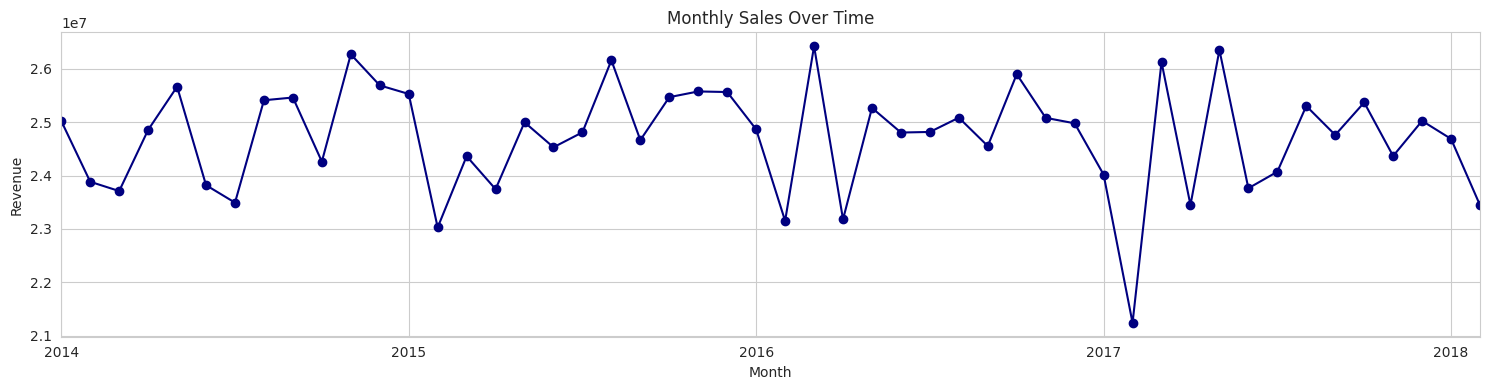

In [120]:
# Monthly sales over time
df['order_month'] = df['order_date'].dt.to_period('M')

monthly_sales = (
    df.groupby('order_month')['revenue']
      .sum()
      .sort_index()
)

plt.figure(figsize=(15, 4))
monthly_sales.plot(marker='o', color='navy')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


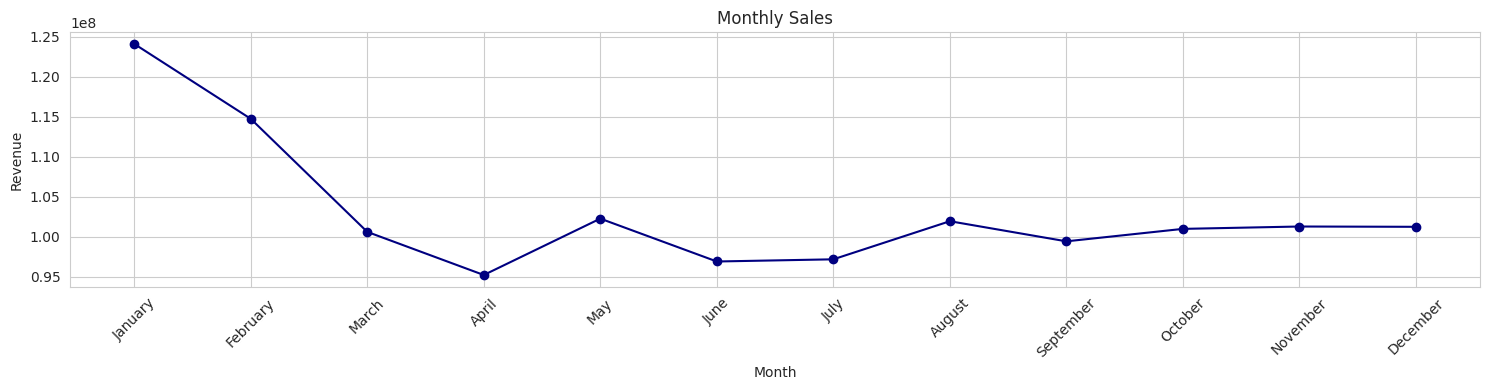

In [100]:
# Monthly Sales
df['order_month_name'] = df['order_date'].dt.month_name()
df['order_month_num'] = df['order_date'].dt.month

# Group and sort by month number to ensure correct order
monthly_sales = (
    df.groupby(['order_month_num', 'order_month_name'])['revenue']
      .sum()
      .reset_index()
      .sort_values('order_month_num')
)

# Plot
plt.figure(figsize=(15, 4))
plt.plot(
    monthly_sales['order_month_name'],
    monthly_sales['revenue'],
    marker='o',
    color='navy'
)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


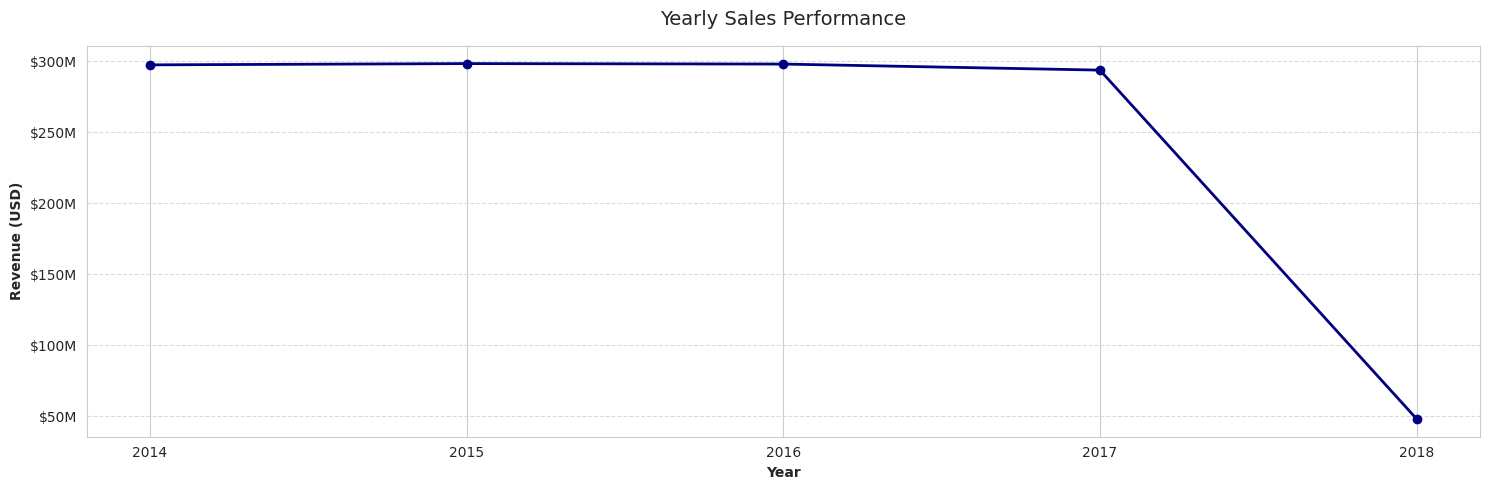

In [127]:
df_sales_by_year = df.groupby(df['order_date'].dt.year)['revenue'].sum()


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(15, 5))

# 1. Plotting - no change needed here
plt.plot(df_sales_by_year.index, df_sales_by_year.values, marker='o', color='navy', linewidth=2)

# 2. Fix the X-axis Year labels (removes the .5 decimals)
plt.xticks(df_sales_by_year.index)

# 3. Clean up the Y-axis (optional but recommended)
# This converts 300,000,000 to "300M" for better readability
def millions(x, pos):
    return f'${x*1e-6:.0f}M'

formatter = ticker.FuncFormatter(millions)
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Yearly Sales Performance', fontsize=14, pad=15)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Revenue (USD)', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7) # Only horizontal lines for cleaner look
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Revenue')

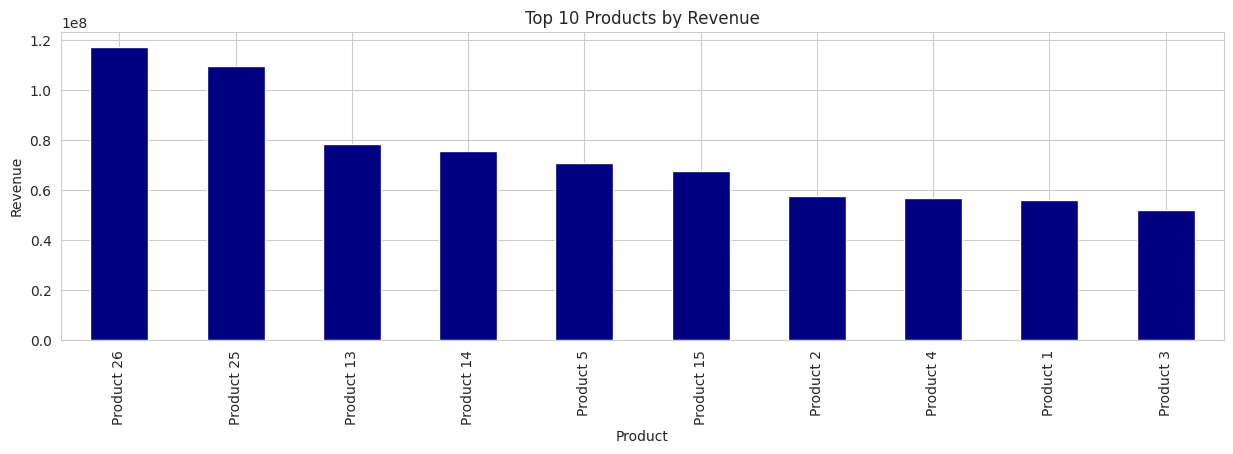

In [101]:
#Top 10 products by Revenue
product_revenue = (
    df.groupby('product_name')['revenue']
      .sum()
      .sort_values(ascending=False)
      .head(10)

)
plt.figure(figsize=(15, 4))
product_revenue.plot(kind='bar', color='navy')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Revenue')

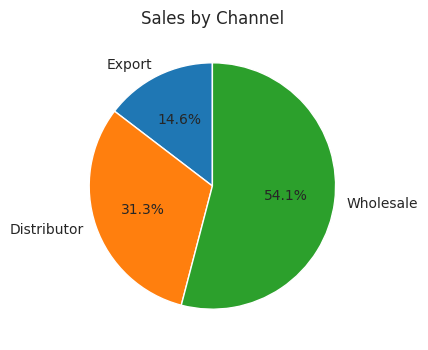

In [102]:
# Sales by channel pie chart
channel_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=True)
plt.figure(figsize=(15, 4))
plt.pie(
    channel_sales,
    labels=channel_sales.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Sales by Channel')
plt.show()



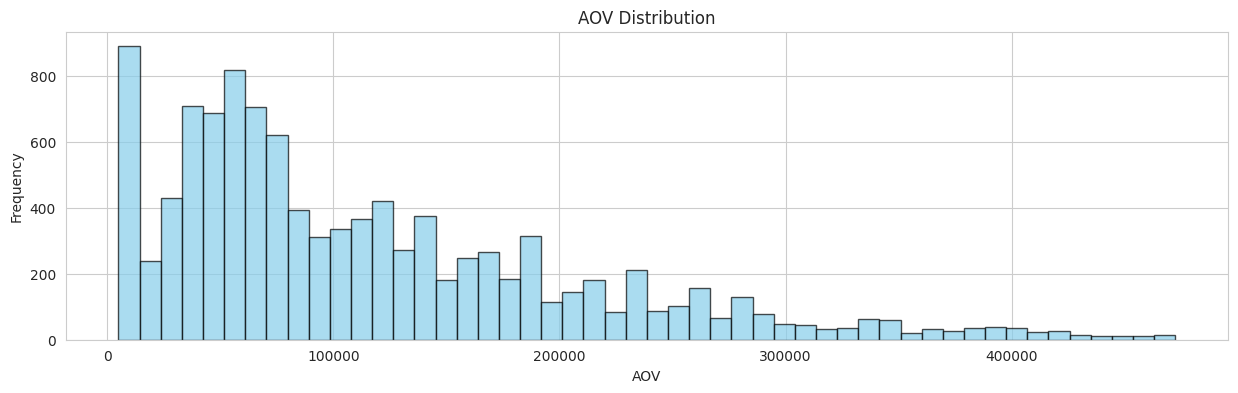

In [103]:
#Average order Value(AOV)
AOV = df.groupby('order_number')['revenue'].sum()

plt.figure(figsize=(15, 4))
AOV.hist(
    bins=50,
    color='skyblue',
    edgecolor='black',
    alpha=0.7
)

plt.title('AOV Distribution')
plt.xlabel('AOV')
plt.ylabel('Frequency')
plt.show()


Text(0, 0.5, 'AOV')

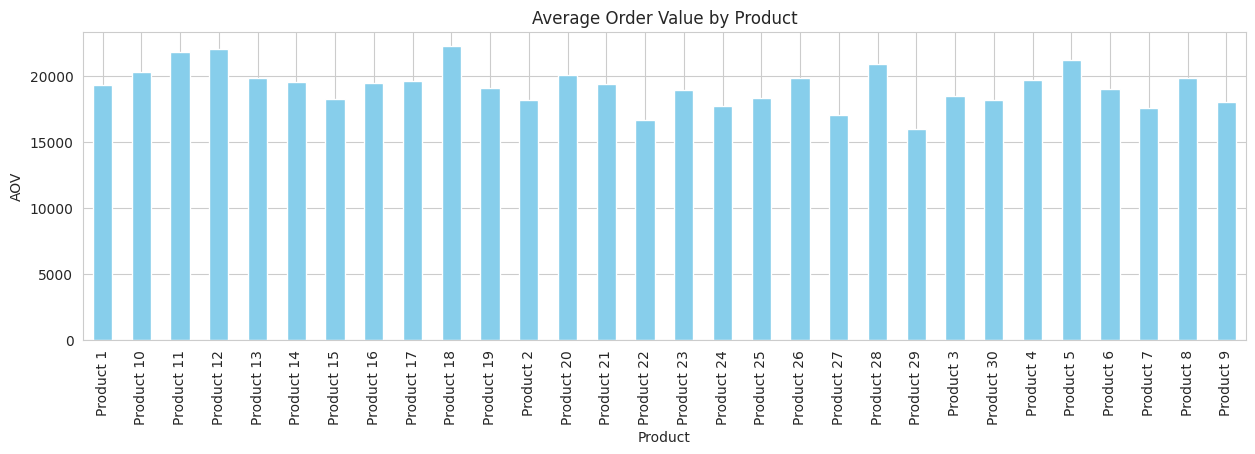

In [128]:
AOV_product = df.groupby('product_name')['revenue'].mean()

plt.figure(figsize=(15, 4))
AOV_product.plot(kind='bar', color='skyblue')
plt.title('Average Order Value by Product')
plt.xlabel('Product')
plt.ylabel('AOV')


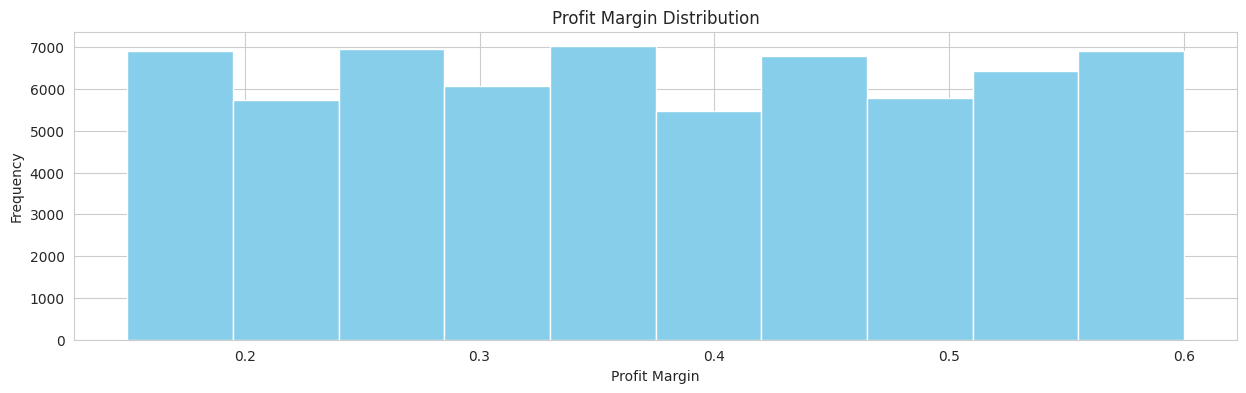

In [130]:
#Profit margin
df_profit_margin=df['profit']/df['revenue']

plt.figure(figsize=(15, 4))
plt.hist(df_profit_margin,color ='skyblue')
plt.title('Profit Margin Distribution')
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
plt.show()

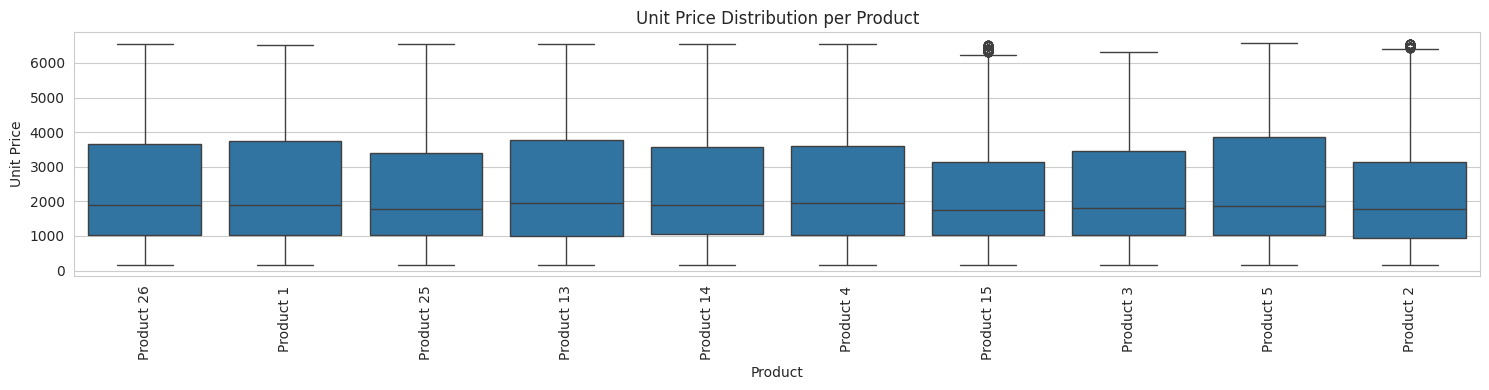

In [107]:
# Unit price distribution by product

product_revenue=df.groupby('product_name')['revenue'].sum().reset_index()
top_10_products= product_revenue.sort_values(by='revenue',ascending=False).head(10)['product_name'].tolist()
df_top_10_products=df[df['product_name'].isin(top_10_products)]

#create the boxplot
plt.figure(figsize=(15, 4))
sns.boxplot(data=df_top_10_products, x='product_name', y='unit_price')
plt.title('Unit Price Distribution per Product')
plt.xlabel('Product')
plt.ylabel('Unit Price')
plt.xticks(rotation=90)
plt.grid(True,axis='y')
plt.tight_layout()
plt.show()



In [144]:
# Top 10 state revenue producing
# 1. Remove any duplicate columns first
df = df.loc[:, ~df.columns.duplicated()].copy()

# 2. Calculate the top 10
df_top_10_state_revenue = (
    df.groupby('state_full_name')['revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(df_top_10_state_revenue)


state_full_name
california       228785436.0
illinois         111050965.7
florida           90204679.5
texas             84011903.0
new york          55534960.0
indiana           54601690.2
new jersey        46830956.5
connecticut       44251228.7
michigan          39025315.8
massachusetts     35011942.1
Name: revenue, dtype: float64


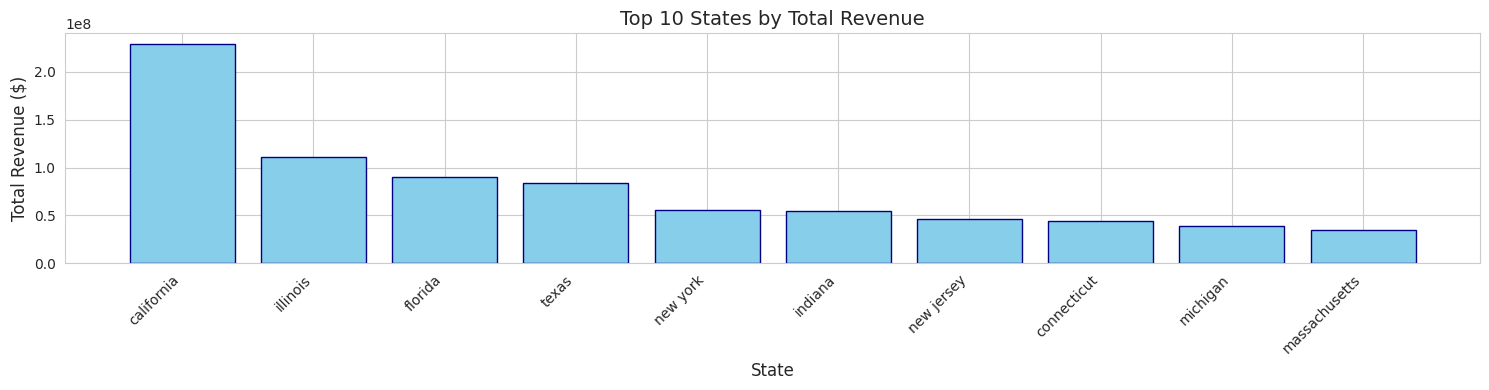

In [151]:
 # Top 10 state revenue producing
plt.figure(figsize=(15, 4)) # Explicitly set a valid figure size for this plot
plt.bar(df_top_10_state_revenue.index, df_top_10_state_revenue.values, color='skyblue', edgecolor='navy')

# Add titles and labels
plt.title('Top 10 States by Total Revenue', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)

# Rotate state names so they don't overlap
plt.xticks(rotation=45, ha='right')

# Automatically adjust layout so labels aren't cut off
plt.tight_layout()

plt.show()

In [152]:
#customer Segmentation by revenue
df_customer_segmentation=df.groupby('customer_names')['revenue'].sum().reset_index()
df_customer_segmentation.head(10)

,customer_names,revenue
0,ALK-Abello Ltd,7662321.0
1,Accord Group,7116927.6
2,Accudial Company,5835994.8
3,Actavis Company,7074074.4
4,Aibox Company,12641251.8
5,Aimbo Corp,8410161.6
6,Aldi Ltd,5198382.6
7,Alembic Ltd,8329801.8
8,American Corp,5299204.2
9,Amerisourc Corp,5308852.2


In [154]:
#Revenue by channel
df_revenue_by_channel=df.groupby('channel')['revenue'].sum().reset_index()
df_revenue_by_channel.head(10)

,channel,revenue
0,Distributor,387139788.6
1,Export,180631866.0
2,Wholesale,668197244.4


In [155]:
#Profit margin by region
df_profit_margin_by_region=df.groupby('region')['profit_margin'].mean().reset_index()
df_profit_margin_by_region.head(10)

,region,profit_margin
0,Midwest,37.522004
1,Northeast,37.206333
2,South,37.301506
3,West,37.356141


In [157]:
#Order quantity by state
df_order_quantity_by_state=df.groupby('state_full_name')['order_quantity'].sum().reset_index()
df_order_quantity_by_state.head(10)

,state_full_name,order_quantity
0,alabama,5020
1,arizona,10583
2,arkansas,4400
3,california,101222
4,colorado,11815
5,connecticut,19145
6,delaware,584
7,district of columbia,695
8,florida,38921
9,georgia,9068


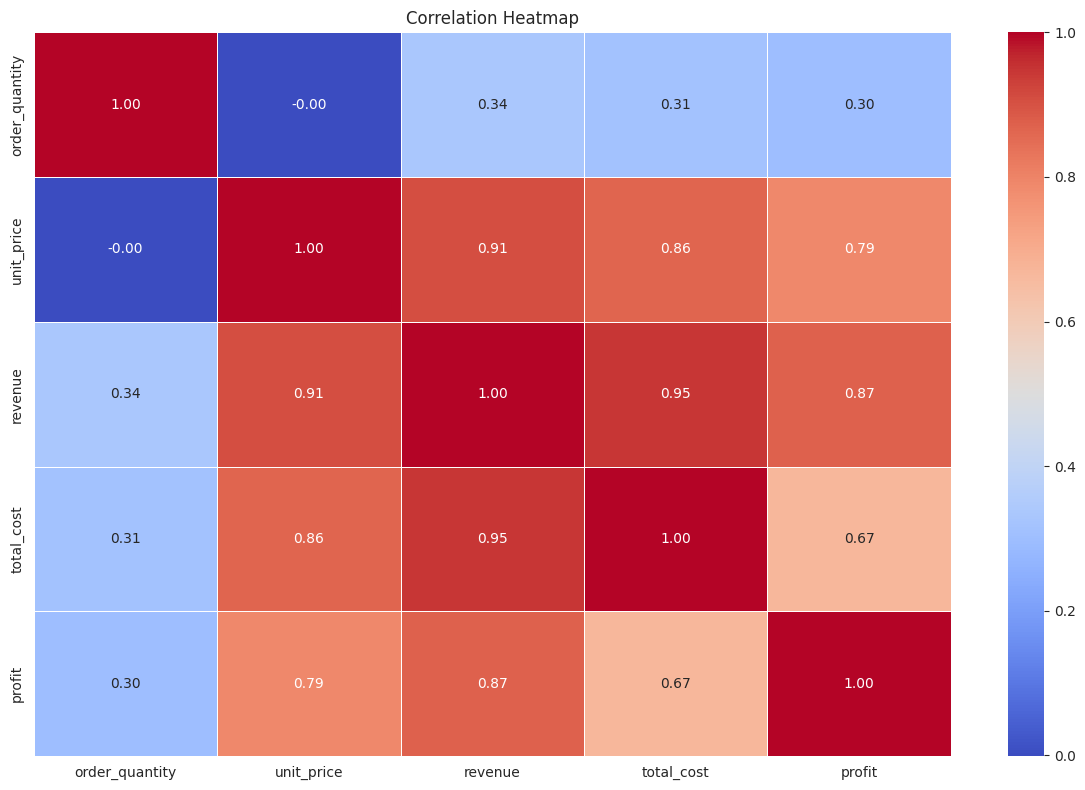

In [162]:
# Select numeric columns
numeric_cols = [
    "order_quantity",
    "unit_price",
    "revenue",
    "total_cost",
    "profit",  # error fixed
]

df_numeric = df[numeric_cols]

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()



1. Revenue is driven mainly by price, not quantity

Revenue ↔ Unit price: 0.91 (very strong)

Revenue ↔ Order quantity: 0.34 (moderate)

➡️ Increasing price has a much stronger impact on revenue than increasing volume.

2. Costs scale with revenue and price

Total cost ↔ Revenue: 0.95 (extremely strong)

Total cost ↔ Unit price: 0.86

➡️ Higher-priced items also tend to be more expensive to produce or deliver.

3. Profit follows revenue closely

Profit ↔ Revenue: 0.87

Profit ↔ Unit price: 0.79

➡️ Profit growth is largely achieved through higher-priced sales, not sheer volume.

4. Quantity has limited influence on profit

Profit ↔ Order quantity: 0.30

➡️ Selling more units helps, but the effect is secondary compared to pricing.

5. Cost reduces—but does not eliminate—profit

Profit ↔ Total cost: 0.67

➡️ Even though costs rise with revenue, margin is still positive, suggesting pricing covers cost increases.

Business Implications
✅ What’s working

Pricing strategy is effective

Revenue and profit move together

Costs scale predictably with sales

⚠️ Risks

Heavy dependence on price → vulnerable to price sensitivity

Potential multicollinearity (revenue, cost, price are tightly linked)